<h1>Intro to Computer Music, Lab06</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:

1. learn how to generate "bitwise-operation music"
2. learn basic AM & FM synthesis techiques 

<h2> Load packages </h2>


In [3]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from __future__ import print_function
from pylab import *
from operator import add
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs # use the print() function from Python3

<h2>Recap: </h2>
<h3>A pure sine wave </h3>


In [4]:
# create a sine wave from scratch 
# try to modify some parameters
A = 1;
f = 440;
#f = 440 * 11
phi = 0;
sr = 44100;
#sr = 4410
T = 5;
y = [A * sin(2*pi*f*t + phi) for t in arange(0.,T,1./sr)]
# write it as a function
def cos_wave(A, f, t, sr):
    return [A * cos(2*pi*f*t) for t in arange(0.,t,1./sr)]
IPython.display.Audio(data=y, rate=sr) # press the "play" button to hear audio


<h3> Intentional aliasing </h3>

In [5]:
f0 = 300;
ratio = 2
ratio = 2**(1./7)
yy = []
for i in range(0,1000):
    y = cos_wave(random(), f0 * (ratio**i), random(), 300.)
    print(i,f0 * (ratio**i))
    yy = yy + y



0 300.0
1 331.22685410214365
2 365.70409626134256
3 403.7700577897067
4 445.7982867410844
5 492.20121360458256
6 543.4341985583437
7 599.9999999999997
8 662.453708204287
9 731.4081925226847
10 807.540115579413
11 891.5965734821682
12 984.4024272091647
13 1086.8683971166868
14 1199.9999999999986
15 1324.9074164085735
16 1462.8163850453686
17 1615.0802311588252
18 1783.1931469643357
19 1968.8048544183282
20 2173.7367942333726
21 2399.999999999996
22 2649.814832817145
23 2925.6327700907354
24 3230.1604623176486
25 3566.386293928669
26 3937.609708836654
27 4347.4735884667425
28 4799.999999999989
29 5299.629665634287
30 5851.265540181468
31 6460.3209246352935
32 7132.772587857335
33 7875.219417673305
34 8694.947176933481
35 9599.999999999973
36 10599.259331268568
37 11702.531080362929
38 12920.641849270582
39 14265.54517571466
40 15750.438835346598
41 17389.894353866952
42 19199.999999999935
43 21198.518662537128
44 23405.062160725847
45 25841.283698541145
46 28531.090351429306
47 31500.877

430 9.310303650841731e+20
431 1.0279408630013367e+21
432 1.1349387275165845e+21
433 1.2530739477133611e+21
434 1.3835058055281692e+21
435 1.527514251990492e+21
436 1.6865124676099996e+21
437 1.8620607301683454e+21
438 2.0558817260026722e+21
439 2.269877455033168e+21
440 2.506147895426721e+21
441 2.767011611056337e+21
442 3.0550285039809824e+21
443 3.373024935219997e+21
444 3.7241214603366886e+21
445 4.1117634520053417e+21
446 4.5397549100663335e+21
447 5.012295790853439e+21
448 5.53402322211267e+21
449 6.110057007961961e+21
450 6.746049870439991e+21
451 7.448242920673373e+21
452 8.22352690401068e+21
453 9.079509820132662e+21
454 1.0024591581706875e+22
455 1.1068046444225335e+22
456 1.2220114015923917e+22
457 1.3492099740879972e+22
458 1.4896485841346738e+22
459 1.644705380802135e+22
460 1.8159019640265315e+22
461 2.0049183163413736e+22
462 2.2136092888450657e+22
463 2.4440228031847817e+22
464 2.6984199481759927e+22
465 2.979297168269346e+22
466 3.289410761604268e+22
467 3.6318039280530

869 7.044416118852881e+39
870 7.777665966780241e+39
871 8.587239434779758e+39
872 9.481081011346564e+39
873 1.0467962122919644e+40
874 1.1557567209450237e+40
875 1.2760588759534312e+40
876 1.4088832237705755e+40
877 1.5555331933560475e+40
878 1.7174478869559503e+40
879 1.8962162022693118e+40
880 2.0935924245839278e+40
881 2.311513441890046e+40
882 2.552117751906861e+40
883 2.817766447541149e+40
884 3.111066386712093e+40
885 3.434895773911899e+40
886 3.792432404538622e+40
887 4.187184849167853e+40
888 4.62302688378009e+40
889 5.104235503813719e+40
890 5.635532895082296e+40
891 6.222132773424183e+40
892 6.869791547823794e+40
893 7.58486480907724e+40
894 8.374369698335702e+40
895 9.246053767560174e+40
896 1.0208471007627432e+41
897 1.1271065790164585e+41
898 1.2444265546848359e+41
899 1.3739583095647581e+41
900 1.516972961815447e+41
901 1.6748739396671395e+41
902 1.849210753512034e+41
903 2.0416942015254853e+41
904 2.2542131580329158e+41
905 2.4888531093696706e+41
906 2.7479166191295147e+

In [6]:
IPython.display.Audio(data=yy, rate=4410) 

<h3> Why？Hint: </h3>
https://en.wikipedia.org/wiki/Double-precision_floating-point_format

In [7]:
a = 6.10160060062e+13
print(a - 100)
b = 6.10160060062e+17
print(b - 100)
# check the difference between 5 and 500
y = cos_wave(1, f0 * (ratio**500), 5, 4410.)
y = cos_wave(1, f0 * (ratio**500), 500, 4410.)
IPython.display.Audio(data=y, rate=4410) 

61016006006100.0
6.101600600619999e+17


<h3>Bitwise-operation music</h3>
<h4>The building block: t & t >> 8, see more at https://youtu.be/qlrs2Vorw2Y </h4>

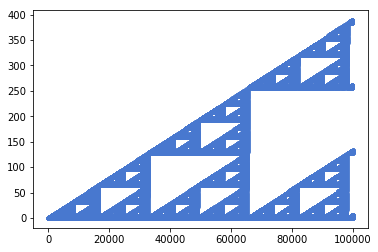

In [8]:
wave = [x & x >> 8 for x in range(100000)]
plt.plot(wave,'.')
plt.show()
#IPython.display.Audio(data=wave, rate=4410) # press the "play" button to hear audio

It sounds a little different from the online examples, right? 
This audio display funciton probably automatically scaled the signal from 0 to 1. In order to mimic the online examples, we can do:

In [15]:
Max_value = 0.99
wave = [min(x & x >> 8, Max_value) for x in range(100000)]
IPython.display.Audio(data=wave, rate=4410) # press the "play" button to hear audio

Now, you can save this audio file. Be sure to put "array" operation here and to use the same sample rate you used to create the wave.

<h2>Basic AM and FM synthesis</h2>


In [16]:
sr = 44100
# A pure sine wave
Fc = 440
gmin =  [sin(2*pi*Fc*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [17]:
# get rid of the clip
sr = 44100
# A pure sine wave
Fc = 440
gmin =  [sin(2*pi*Fc*n) * exp(-5*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [18]:
sr = 44100
# A ring sound
Fc = 440
Fm = 660
gmin =  [sin(2*pi*Fc*n) * sin(2*pi*Fm*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [19]:
sr = 44100
# A ring sound
Fc = 440
Fm = 660
gmin =  [sin(2*pi*Fc*n) * sin(2*pi*Fm*n) * exp(-5*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [20]:
# a normal vibrato
Fm = 1
index = 100
gmin1 =  [cos(2*pi*440*n + index * cos(2*pi*Fm*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin1, rate=sr) # press the "play" button to hear audio


In [21]:
# simple FM where C = M
gmin1 =  [cos(2*pi*440*n + 4 * cos(2*pi*440*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin1, rate=sr) # press the "play" button to hear audio


In [22]:
# increasing the depth over time: brass sound
gmin1 =  [sin(2*pi*440*n + (4*n) * sin(2*pi*440*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin1, rate=sr) # press the "play" button to hear audio

In [23]:
# Let's try something crazy
Fm = 886;
gmin2 =  [cos(2*pi*440*n + index * cos(2*pi*Fm*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin2, rate=sr) # press the "play" button to hear audio

In [24]:
# FM + AM
Fm = 440;
gmin2 =  [cos(2*pi*440*n + (exp(n)) * cos(2*pi*Fm*n)) * sin(2*pi*443*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin2, rate=sr) # press the "play" button to hear audio

In [25]:
# Envelopes matter a lot!!! 
Fm = 886;
gmin2 =  [cos(2*pi*440*n + exp(-4*n) * cos(2*pi*Fm*n)) * exp(-5*n) for n in arange(0.,2.,1./44100)]
gmin3 = gmin2[::-1]
IPython.display.Audio(data=gmin3, rate=sr) # press the "play" button to hear audio

<h2> Group Project: Due in 2 weeks</h2>
<h4> Group: A group of 2-3 students. </h4>
<h4> Project: A composition at least 3 minutes.</h4>
<h4> Techniques: A combination of the techniques you have learned, including but not limited to: AM synthesis, FM synthesis, bit-wise composition, and Intentional aliasing.</h4>



In [26]:
# A Naive attempt of voice synthesis 
Fc = 600
Fm = Fc * 0.25
Fa = 6
index = 5
gmin1 =  [cos((2*pi*Fc*n) + 3.4 * cos(2*pi*Fm*n)) * (sin(2*pi*Fa*n) + 18) for n in arange(0.,2.,1./44100)]
gmin2 =  [cos((2*pi*Fc*4*n) + 9 * cos(2*pi*Fm*n)) * (sin(2*pi*Fa*n) + 2) for n in arange(0.,2.,1./44100)]
gmin = add(gmin1, gmin2)
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio
